<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ref" data-toc-modified-id="Ref-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ref</a></span></li><li><span><a href="#Abstract" data-toc-modified-id="Abstract-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Abstract</a></span></li><li><span><a href="#numpy" data-toc-modified-id="numpy-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>numpy</a></span></li><li><span><a href="#tfp" data-toc-modified-id="tfp-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>tfp</a></span></li></ul></div>

# Ref
0. [wiki](https://zh.wikipedia.org/wiki/%E7%8B%84%E5%88%A9%E5%85%8B%E9%9B%B7%E5%88%86%E5%B8%83)

1. [LDA](https://blog.rosetta.ai/%E6%B7%B1%E5%85%A5%E6%8E%A2%E8%A8%8E-latent-dirichlet-allocation-lda-%E8%88%87%E5%9C%A8%E6%8E%A8%E8%96%A6%E7%B3%BB%E7%B5%B1%E4%B8%8A%E7%9A%84%E6%87%89%E7%94%A8-2441d57ecc8a)

2. [example tfp](http://hyperion.usc.edu/UQ-SummerSchool/pres/Dillon.pdf)

3. [example numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.dirichlet.html)

4. [all about the distribution - dirichlet vs milti-nominal](https://github.com/YLTsai0609/DataScience_Note/blob/master/All_about_the_distribution.md)

5. [什么是狄利克雷分布？狄利克雷过程又是什么？ 贊同 800+](https://www.zhihu.com/question/26751755)

tags : LDA, dirichlet distribution, nonparametric bayesian

# Abstract

要易懂的理解 dirichlet distribution, 要先了解他的特殊版本 beta distribution

要了解 beta distribution, 要先了解 Bernoulli process

要了解 Bernoulli process, 要先了解 bernoulli trial

1. bernoulli trial - 白努力試驗
    不均勻硬幣
    
    $X=1$ : 頭
    
    $X=0$ : 字
    
    $q$ :  拋出字的機率

<br>

2. bernolli process - 白努力過程

    狂拋硬幣$n$次記錄結果，紀錄$X=0$的次數為$k$
    
    (又稱重複、獨立$n$次的 bernoulli trials)
    
    (又稱 random sampling from bernoulli population)
    
Q : 如何知道這枚硬幣拋出字的機率?

A1 : 當次數越來越多，$\frac{k}{n} \rightarrow q$

A2 : 次數少時，$\frac{k}{n}$ 顯然不夠靠譜，但已經拋4次了，觀察資料可以更有信心

頭頭字字 : $q$ 在0.5附近更合理, $q$ 在 0.05, 0.95 太扯

連續拋 $n$ 次，$k$ 次 $X=0$

$P(X=x|p) = q^{k}(1-q)^{n-k}$

先驗分佈可設為 beta distribution，beta distribution 可讓 bernolli process 一直維持同樣的數學形式

Beta distribution 有 shape parameter $\alpha, \beta$

[check here](https://yulongtsai.medium.com/why-choose-beta-distribution-as-prior-9f0d5f7d0e3)

3. 當硬幣變成骰子 

不再只有兩種可能，有多種可能($k$種可能結果)， bernoulli distribution --> multinominal distribution

beta distribution Beta($\alpha$, $\beta$) --> 有$k$種可能結果，且可以和 multinominal 共軛

Beta($\alpha$, $\beta$) --> dirichlet ($\alpha, k$)


In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import tensorflow_probability as tfp
import matplotlib.pyplot as plt

# plt.style.use('ggplot')

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import cufflinks as cf
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import plotly.express as px
import cufflinks
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

# numpy

In [3]:
# probability : 
# category 1 : category 2 : category 3 = 10 : 5 : 3
# size : sample size return shape (size, k)
# for each trial, only sample one category,
# so the sum of probability  of each trial = 1

s = np.random.dirichlet(alpha=(10, 5, 3), size=20).transpose()

s, s.shape, np.sum(s, axis=0)

(array([[0.43591928, 0.48809698, 0.42317791, 0.42539093, 0.55692763,
         0.46389186, 0.56308921, 0.50205366, 0.779578  , 0.59330009,
         0.5097653 , 0.59906082, 0.32347637, 0.50344825, 0.4377723 ,
         0.55261046, 0.42325162, 0.47174609, 0.47218904, 0.66376581],
        [0.40596577, 0.28948159, 0.54947197, 0.28695337, 0.19243082,
         0.23668918, 0.27517647, 0.25947046, 0.13700897, 0.19650274,
         0.39551817, 0.21655074, 0.32793057, 0.33573541, 0.50250692,
         0.2805981 , 0.38557405, 0.42267692, 0.41370819, 0.24958366],
        [0.15811495, 0.22242143, 0.02735012, 0.28765569, 0.25064154,
         0.29941895, 0.16173433, 0.23847588, 0.08341304, 0.21019717,
         0.09471653, 0.18438844, 0.34859306, 0.16081634, 0.05972078,
         0.16679144, 0.19117433, 0.10557699, 0.11410277, 0.08665053]]),
 (3, 20),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]))

categories :  3  weights : (10, 5, 3)


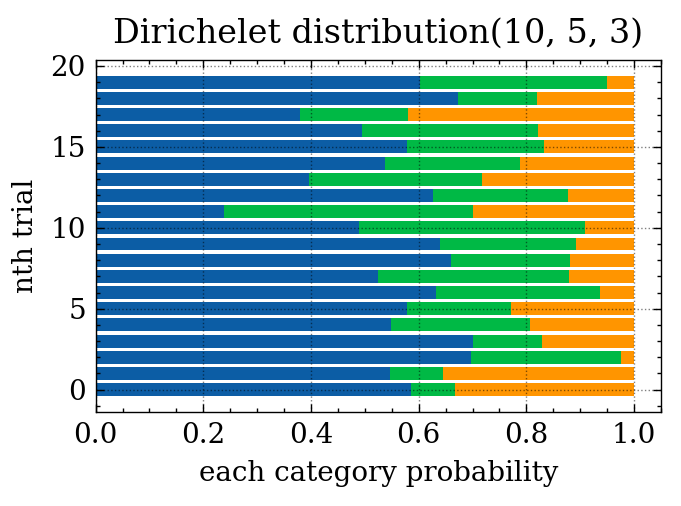

In [4]:
def plot_dirichelet(alpha_param = None, size=20):
    if alpha_param is None:
        alpha_param = (10, 5, 3)
    
    s = np.random.dirichlet(alpha=alpha_param, size=20).transpose()
    
    print('categories : ',len(alpha_param), ' weights :', alpha_param)
    cumsum_prob = np.zeros_like(s[0])
    
    with plt.style.context(['science', 'grid', 'no-latex']):
        fig, ax = plt.subplots(dpi=200)
        for category_i in range(len(alpha_param)):
            if category_i == 0:
                ax.barh(range(20), s[category_i])
            else:
                ax.barh(range(20), s[category_i], left=cumsum_prob)
            cumsum_prob += s[category_i]
        ax.set_title(f"Dirichelet distribution{alpha_param}")
        ax.set_xlabel("each category probability")
        ax.set_ylabel("nth trial")
        plt.tight_layout()
        
        
plot_dirichelet()

categories :  4  weights : [10, 1, 1, 1]
categories :  4  weights : [2, 8, 8, 2]
categories :  4  weights : [1, 10, 50, 20]


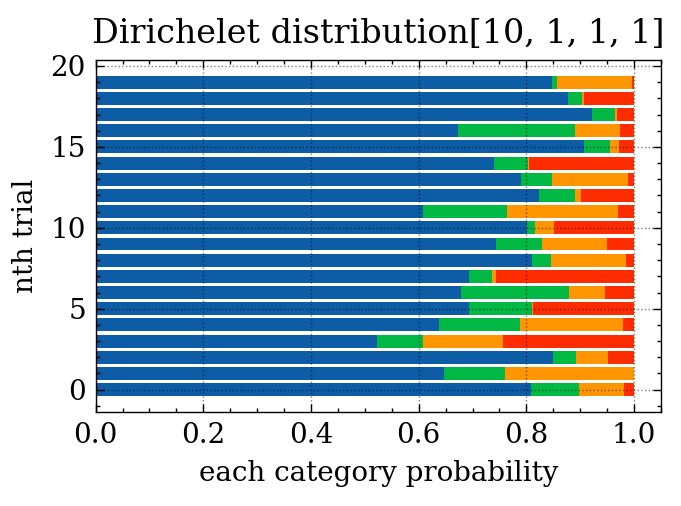

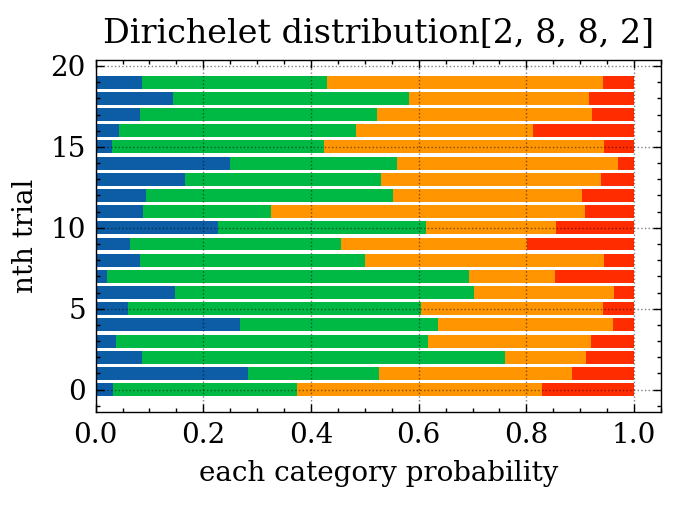

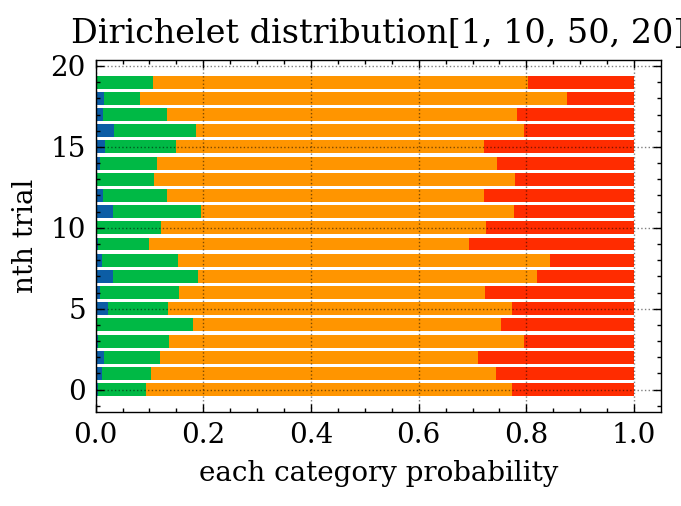

In [5]:
# dirchelet distribution is designed to run bayesian estimation
# for each run, so it's flexable to set each probability
# for example

# image certain topics for 4 words
# diffrent weighting for the words

for alpha_param in [
    [10, 1, 1, 1], # case 1 for 4 categories
    [2, 8, 8, 2], # case 2 for 4 categories
    [1, 10, 50, 20], # case 3 for 4 categories
]:
    plot_dirichelet(alpha_param=alpha_param)

# tfp

In [18]:
tfd = tfp.distributions

print(dir(tfd)[:5])

# tfd.Dirichlet??

tfd.Dirichlet.sample??


['Autoregressive', 'BatchReshape', 'Bernoulli', 'Beta', 'Binomial']


In [14]:
alpha = [1., 2, 3]
dist = tfd.Dirichlet(alpha)

x = dist.sample([4])  # shape: [4, 5, 3]

#   # x has one sample, one batch, three classes:
#   x = [.2, .3, .5]   # shape: [3]
#   dist.prob(x)       # shape: []

In [17]:
# probability ratio 1 2 3
# 4 trials
type(x)
print(np.array(x).shape)
print(np.array(x))
print(np.array(x).sum(axis=1))


(4, 3)
[[0.26743352 0.6092901  0.12327638]
 [0.31041878 0.338298   0.35128316]
 [0.09062636 0.25062263 0.658751  ]
 [0.08546145 0.7071668  0.20737173]]
[1.         1.         1.         0.99999994]
